In [100]:
from labtools import assign_trigs_to_clicks, get_trig_len, get_dump, USER, LOC, correlation, shift_channels, join
import numpy as np
from labtools import time_freq_scan as tfs
from labtools import plot_style, USER, LOC, scanner
import os
from matplotlib import pyplot as plt

In [101]:
DATA_PATH = join(LOC['data'], "scans/Stark_shift")

In [102]:
scans=os.listdir(DATA_PATH)
scans

['Molecule0001',
 'Molecule0006',
 'Molecule0008',
 'Molecule0009',
 'Molecule0007',
 'Molecule0000',
 'Molecule0022',
 'Molecule0013',
 'Molecule0014',
 'Molecule0015',
 'Molecule0012',
 'Molecule0023',
 'Molecule0005',
 'Molecule0002',
 'Molecule0003',
 'Molecule0004',
 'Molecule0019',
 'Molecule0021',
 'Molecule0017',
 'Molecule0010',
 'Molecule0011',
 'Molecule0016',
 'Molecule0020',
 'Molecule0018']

In [103]:
header, raw, freq = scanner.xtract(f"{DATA_PATH}/{scans[6]}")

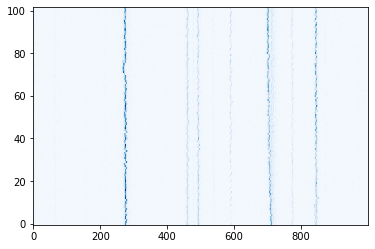

In [104]:
plt.imshow(raw/1e3, aspect='auto', origin='lower', interpolation=
    'nearest', cmap=plt.cm.Blues)

In [105]:
header

['6/11/2020 5:44:31 PM',
 'No of loops= 103',
 'No of bins= 1000',
 'Time per point= 4 ms',
 'Ramp on? Off ',
 'Start ramp voltage= 50V ',
 'Ramp voltage increase=2V ']

In [106]:
from matplotlib import rc, font_manager, rcParams

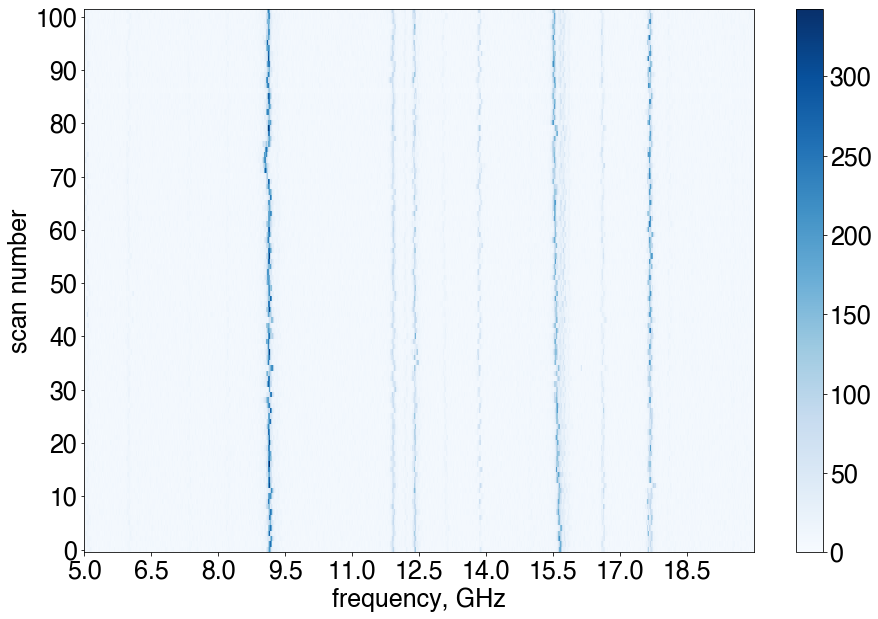

In [113]:
fontProperties = {'family':'sans-serif','sans-serif':['Helvetica'],
    'weight' : 'normal', 'size' : 25}
# ticks_font = font_manager.FontProperties(family='Helvetica', style='normal',
#     size=15, weight='normal', stretch='normal')

# rc('text', usetex=True)
rc('font',**fontProperties)
# axis_font = {'fontname':'Helvetica', 'size':'25'}
# label_font = {'fontname':'Helvetica', 'size':'25'}
# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = 'Helvetica'


plt.figure(figsize=(15,10))
plt.imshow(raw/1e3, aspect='auto', origin='lower', interpolation=
    'nearest', cmap=plt.cm.Blues)
cbar = plt.colorbar()
# cbar.set_label('# of contacts', rotation=270)
# voltage = np.arange(50, 250, 10)
yticks = np.arange(0, raw.shape[0], 10)
plt.yticks(yticks, yticks);
xticks = np.arange(0, raw.shape[1], 100)
plt.xticks(xticks, freq[xticks]/1e3);

plt.xlabel("frequency, GHz")
plt.ylabel("scan number")
plt.savefig('scanA.png', dpi= 300, transparent=True)

In [162]:
raw.shape[1]

5000

In [19]:
voltage[yticks]

array([ 50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250])

In [30]:
voltage

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202])

In [177]:
np.tan(np.pi*0.41)

3.442022576669216

In [178]:
3.44 /2

1.72

In [90]:
def hh(hs, h_na, tan):
    return np.concatenate((h_na*np.ones(hs[hs <= h_na].shape[0]), (h_na/max(np.arctan(h_na*tan/hs[hs > h_na])))*np.arctan(h_na*tan/hs[hs > h_na])))

(0, 6)

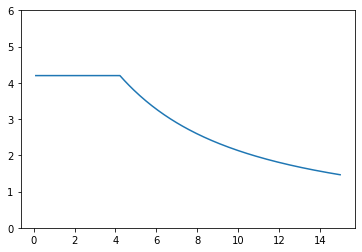

In [98]:
hs = np.linspace(0.1, 15, 200)
plt.plot(hs, hh(hs, 4.2, 1))
plt.ylim((0, 6))

NameError: name 'p' is not defined